In [3]:
!pip install lazypredict

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import torch
import lazypredict

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

Dropping columns with missing values (NaN values). This will drop entire columns where any NaN value is present.
The resulting test_data DataFrame will contain the test dataset with columns dropped for missing values.

In [6]:
# Load train and test datasets
train_data_path = pd.read_csv("Training.csv")
test_data_path = pd.read_csv("Testing.csv")

In [7]:
train_data=(train_data_path).dropna(axis=1)
test_data=(test_data_path).dropna(axis=1)

test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


This code will create a bar plot showing the counts of different diseases in the training dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

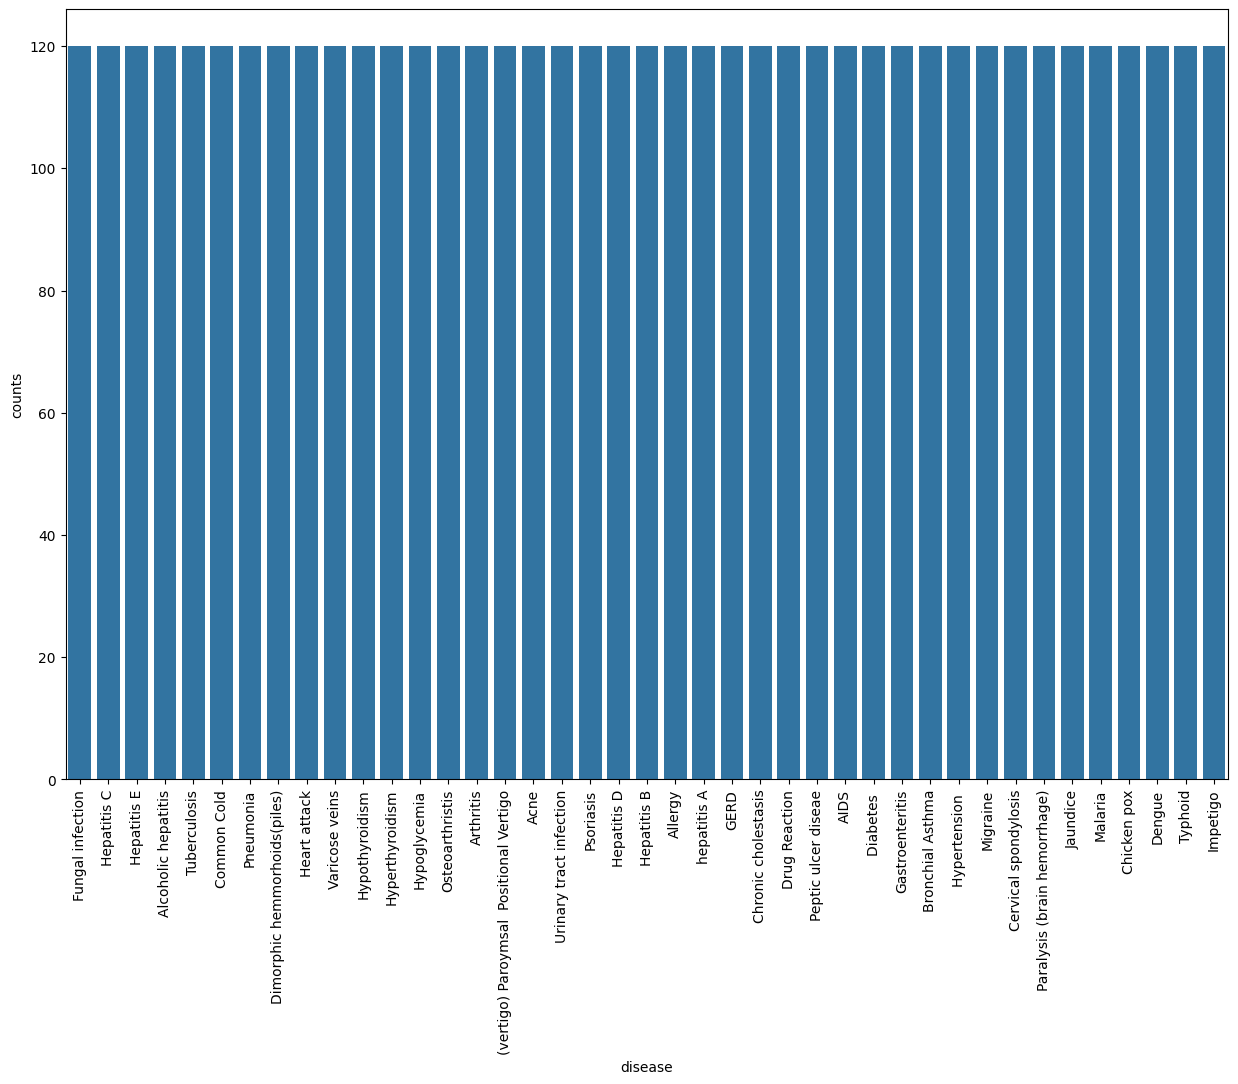

In [8]:
disase_counts=train_data['prognosis'].value_counts()
temp_dataframe=pd.DataFrame({
    'disease': disase_counts.index,
    'counts':disase_counts.values
})

temp_dataframe
plt.figure(figsize=(15,10))
sns.barplot(x='disease',y='counts',data=temp_dataframe)
plt.xticks(rotation=90)
plt.show

LabelEncoder to convert the target variable ('prognosis') from string labels to numerical labels for both the training and test datasets

In [101]:

encoder = LabelEncoder()
train_data['prognosis'] = encoder.fit_transform(train_data['prognosis'])
test_data['prognosis'] = encoder.transform(test_data['prognosis'])
train_data
test_data

<ipython-input-101-c8ab9674d906>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prognosis'] = encoder.fit_transform(train_data['prognosis'])


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


Splits the dataset into features (X) and the target variable (y), and then further splits them into training and testing sets using the train_test_split function from scikit-learn

In [102]:
x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

Preprocessing step to ensure that all features have the same scale

In [103]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Created a dictionary containing various classification models and Each model is initialized with its default hyperparameters.

In [104]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators= 7),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

The train_model_and_evaluate function you provided trains each model on the training data and evaluates its performance on both the training and validation sets.

In [105]:
def train_model_and_evaluate(x,y,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)

    # initalize an empty set to store result
    result_list = []

    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)

        # Predicit the training and valiadtion set
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)


        # Check each predictions accuracy
        train_accuracy = accuracy_score(y_train,y_train_pred)
        vald_accuracy = accuracy_score(y_valid,y_valid_pred)

        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': vald_accuracy
        })

    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)

    return result_df

<p align="justify"> All of the models are achieving perfect accuracy on both the training and validation sets, which could indicate potential issues such as overfitting. The accuracy of the models on the training data is 1.0 (or 100%), meaning that they are able to perfectly predict the target variable on the data they were trained on.


In [14]:
result_df = train_model_and_evaluate(x,y,classification_models)

result_df

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Gradient Boosting,1.0,1.0
4,SVM,1.0,1.0
5,K-Nearest Neighbors,1.0,1.0


In [15]:
x2=test_data.iloc[:,:-1]
y2=test_data.iloc[:,-1]

#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


The test_model_and_evaluate function you provided tests each model on the testing data and evaluates its performance on both the testing and validation sets.

In [16]:
def test_model_and_evaluate(x,y,x1,y1,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)

    # initalize an empty set to store result
    result_list = []

    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)

        # Predicit the testing set
        y_test_pred = model.predict(x1)
            # Check each predictions accuracy
        test_accuracy = accuracy_score(y1,y_test_pred)

        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Test Accuracy': test_accuracy
        })

    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)

    return result_df


Shows accuracy of each model on the test set. It represents how well the models generalize to new, unseen data.


*  Logistic Regression and SVM: Achieving perfect accuracy (1.0) on the test set might indicate that these models generalize well to unseen data.

* Decision Tree, Random Forest, and Gradient Boosting: These models achieved slightly lower accuracy but still performed well on the test set (around 97.62%). This suggests that they also generalize effectively.

* K-Nearest Neighbors: Achieving perfect accuracy (1.0) on the test set suggests good generalization, similar to Logistic Regression and SVM.





In [18]:
result_df2 = test_model_and_evaluate(x,y,x2,y2,classification_models)
result_df2

,Model,Test Accuracy
0,Logistic Regression,1.00000
1,Decision Tree,0.97619
2,Random Forest,0.97619
3,Gradient Boosting,0.97619
4,SVM,1.00000
5,K-Nearest Neighbors,1.00000


Calculate the correlation coefficients between all pairs of numeric features in your training data (train_data) and store the results in the correlation_matrix DataFrame. Each cell in the matrix represents the correlation coefficient between the corresponding pair of features.



* Positive values indicate a positive correlation (as one feature increases, the other also tends to increase)

* Negative values indicate a negative correlation (as one feature increases, the other tends to decrease)

* A correlation coefficient close to 0 indicates little to no linear correlation between the features.





In [34]:
# Compute correlation matrix
correlation_matrix = train_data.corr()
correlation_matrix


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


<Axes: >

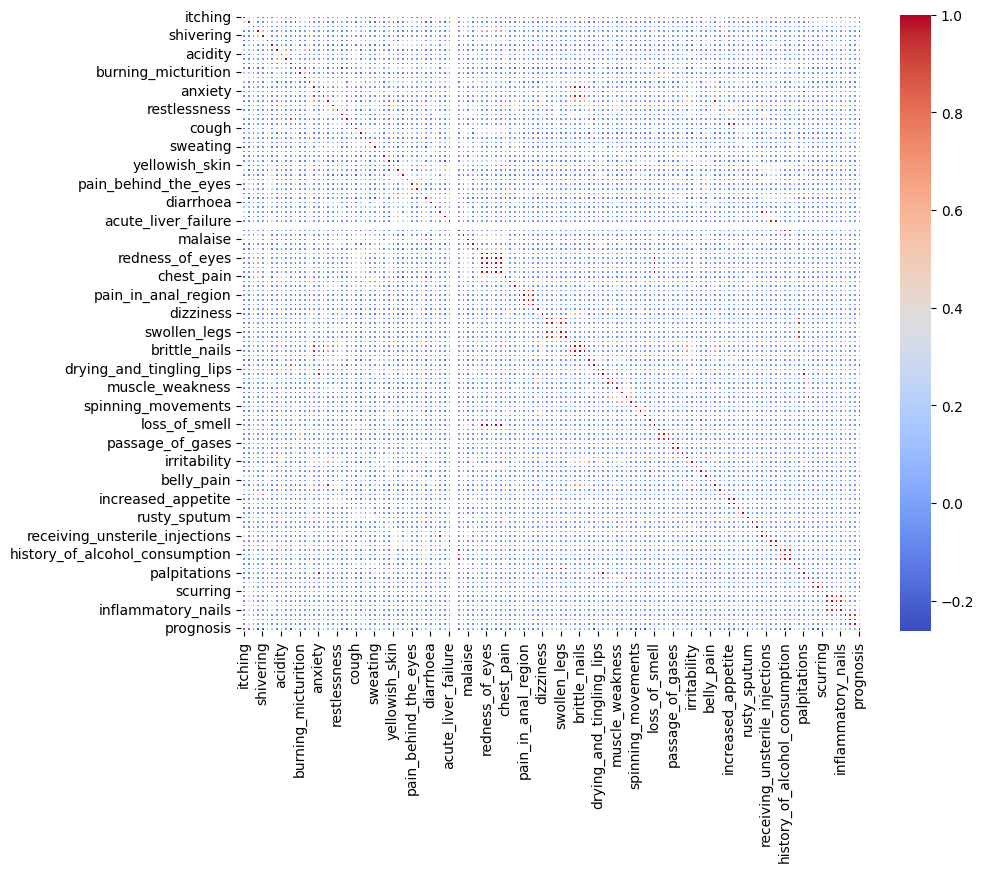

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=False,linewidth=1 , cmap ='coolwarm')

Computes the correlation between symptoms and diseases in your training data by extracting the correlation values between the symptoms (features) and the diseases (target variable) from the correlation matrix

In [48]:
# Compute correlation matrix between symptoms and diseases
symptoms_diseases_correlation = train_data.corr().iloc[:-1, -1]

# Print or visualize the correlation values
print("Correlation between Symptoms and Diseases:")
print(symptoms_diseases_correlation)


Correlation between Symptoms and Diseases:
itching                -0.151898
skin_rash              -0.146564
nodal_skin_eruptions   -0.063307
continuous_sneezing    -0.237346
shivering              -0.202584
                          ...   
small_dents_in_nails    0.195249
inflammatory_nails      0.195249
blister                 0.091116
red_sore_around_nose    0.091116
yellow_crust_ooze       0.091116
Name: prognosis, Length: 132, dtype: float64


Visualizes the correlation values between symptoms and diseases using a scatter plot.

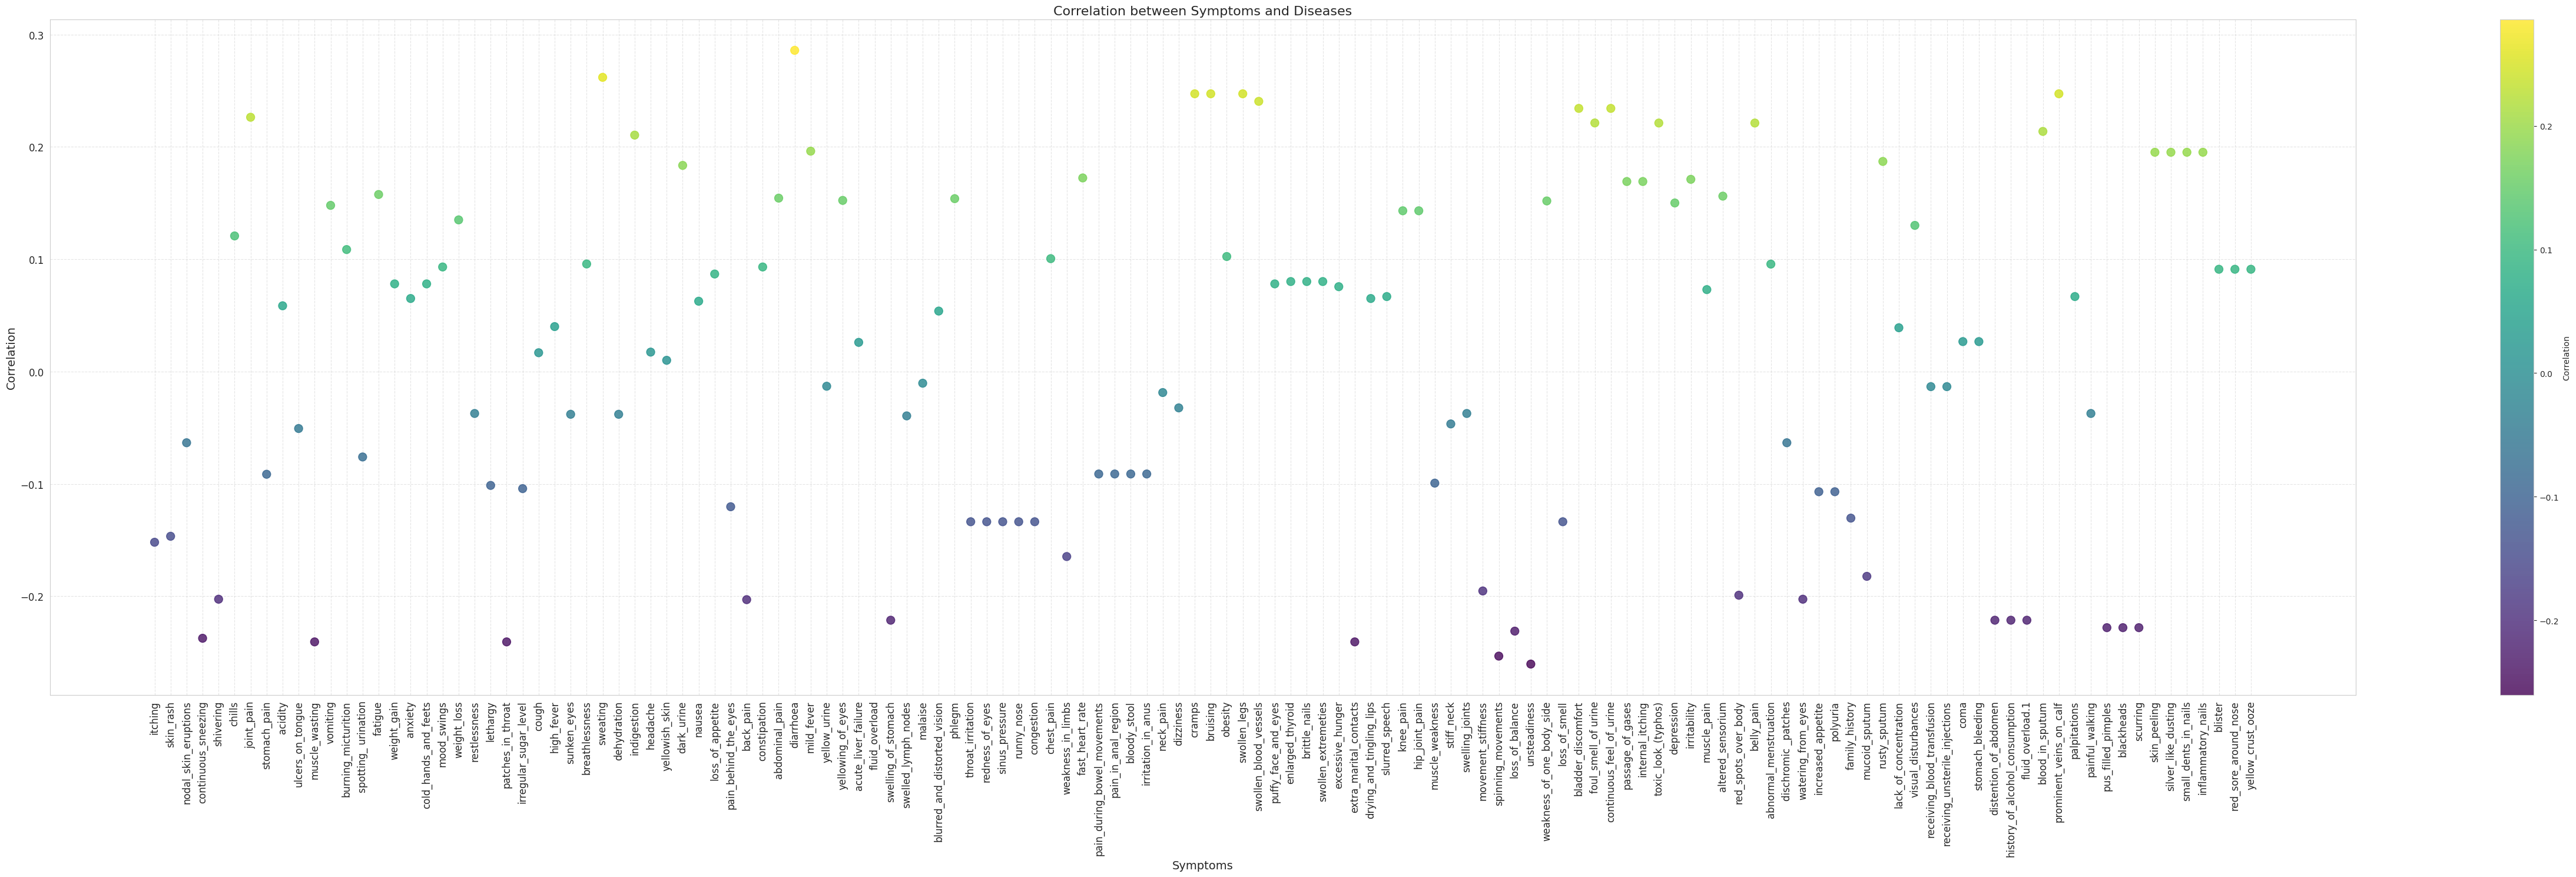

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot correlation values using a scatter plot with the 'viridis' colormap and improved aesthetics
plt.figure(figsize=(50, 15))
scatter = plt.scatter(symptoms_diseases_correlation.index, symptoms_diseases_correlation.values,
                      c=symptoms_diseases_correlation.values, cmap='viridis', s=100, alpha=0.8)
plt.title('Correlation between Symptoms and Diseases', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(scatter, label='Correlation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


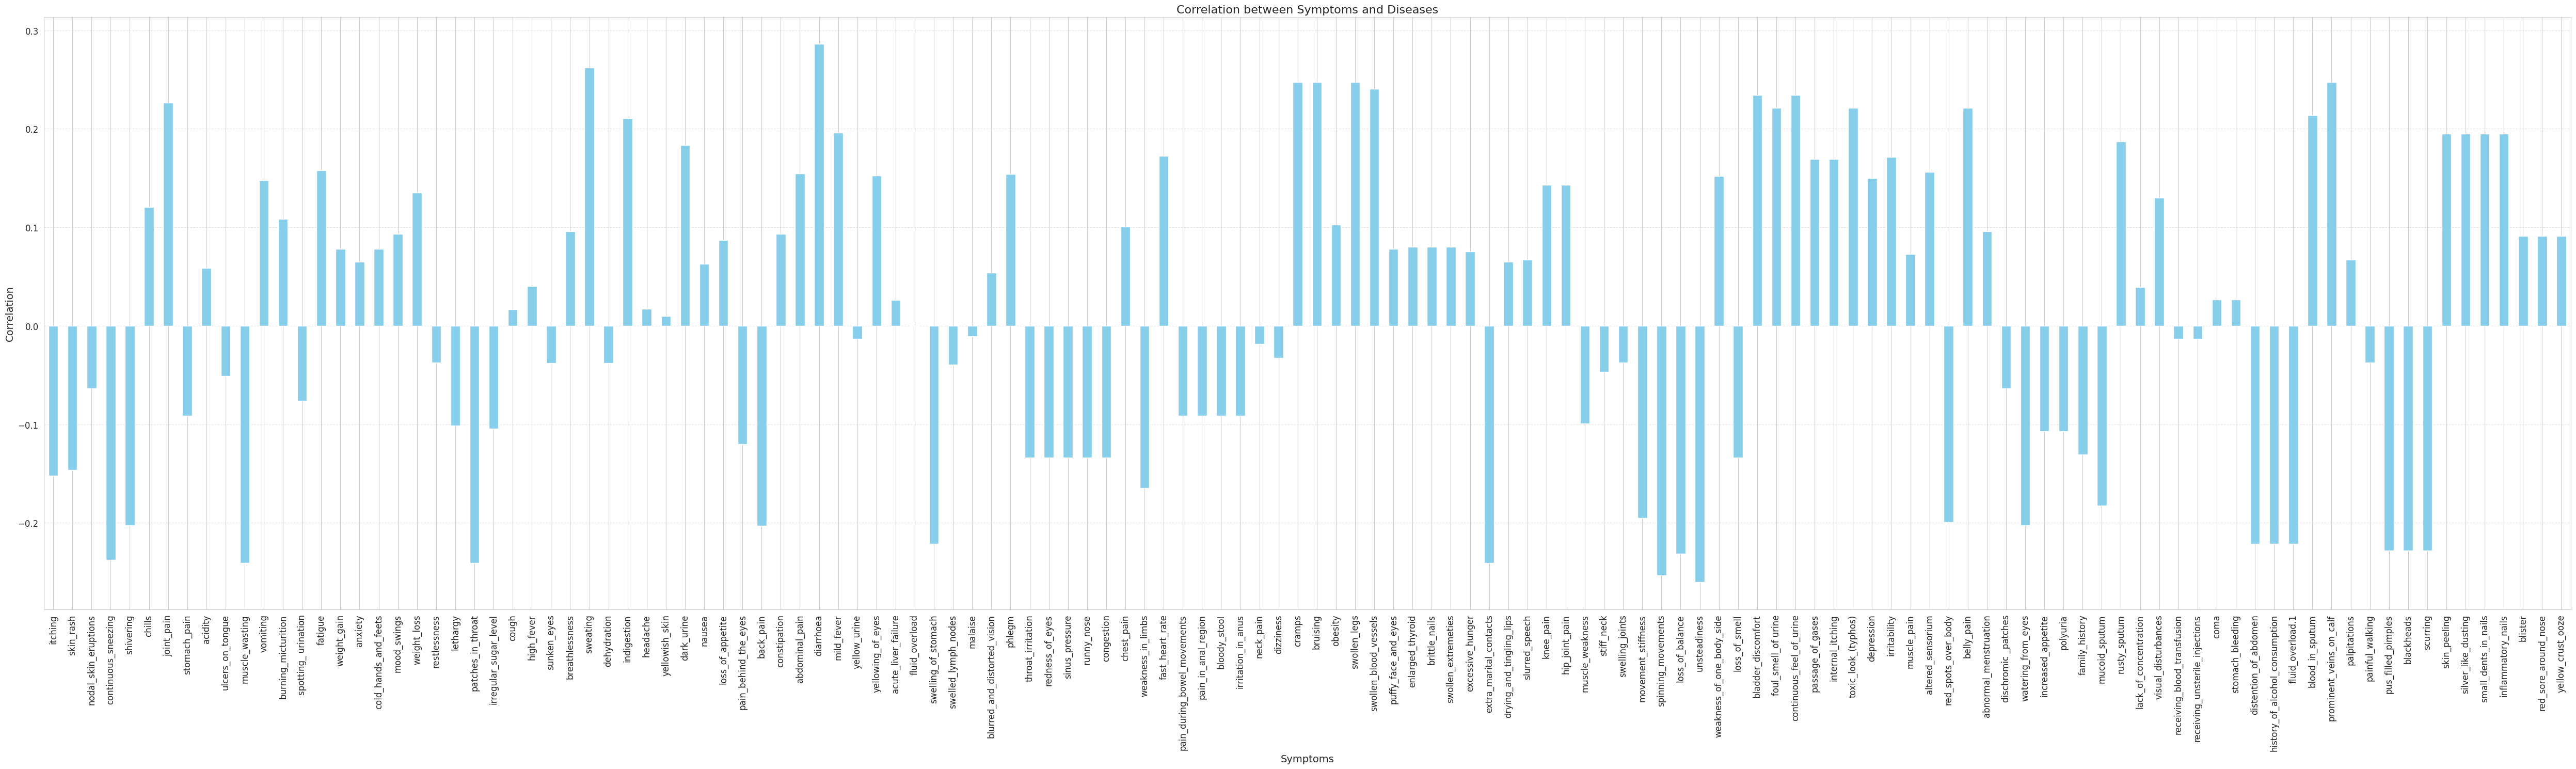

In [107]:
# Plot correlation values using a bar plot
plt.figure(figsize=(50, 15))
symptoms_diseases_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation between Symptoms and Diseases', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-95-486a64150ac7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameters_contributing.values, y=parameters_contributing.index, palette='viridis')


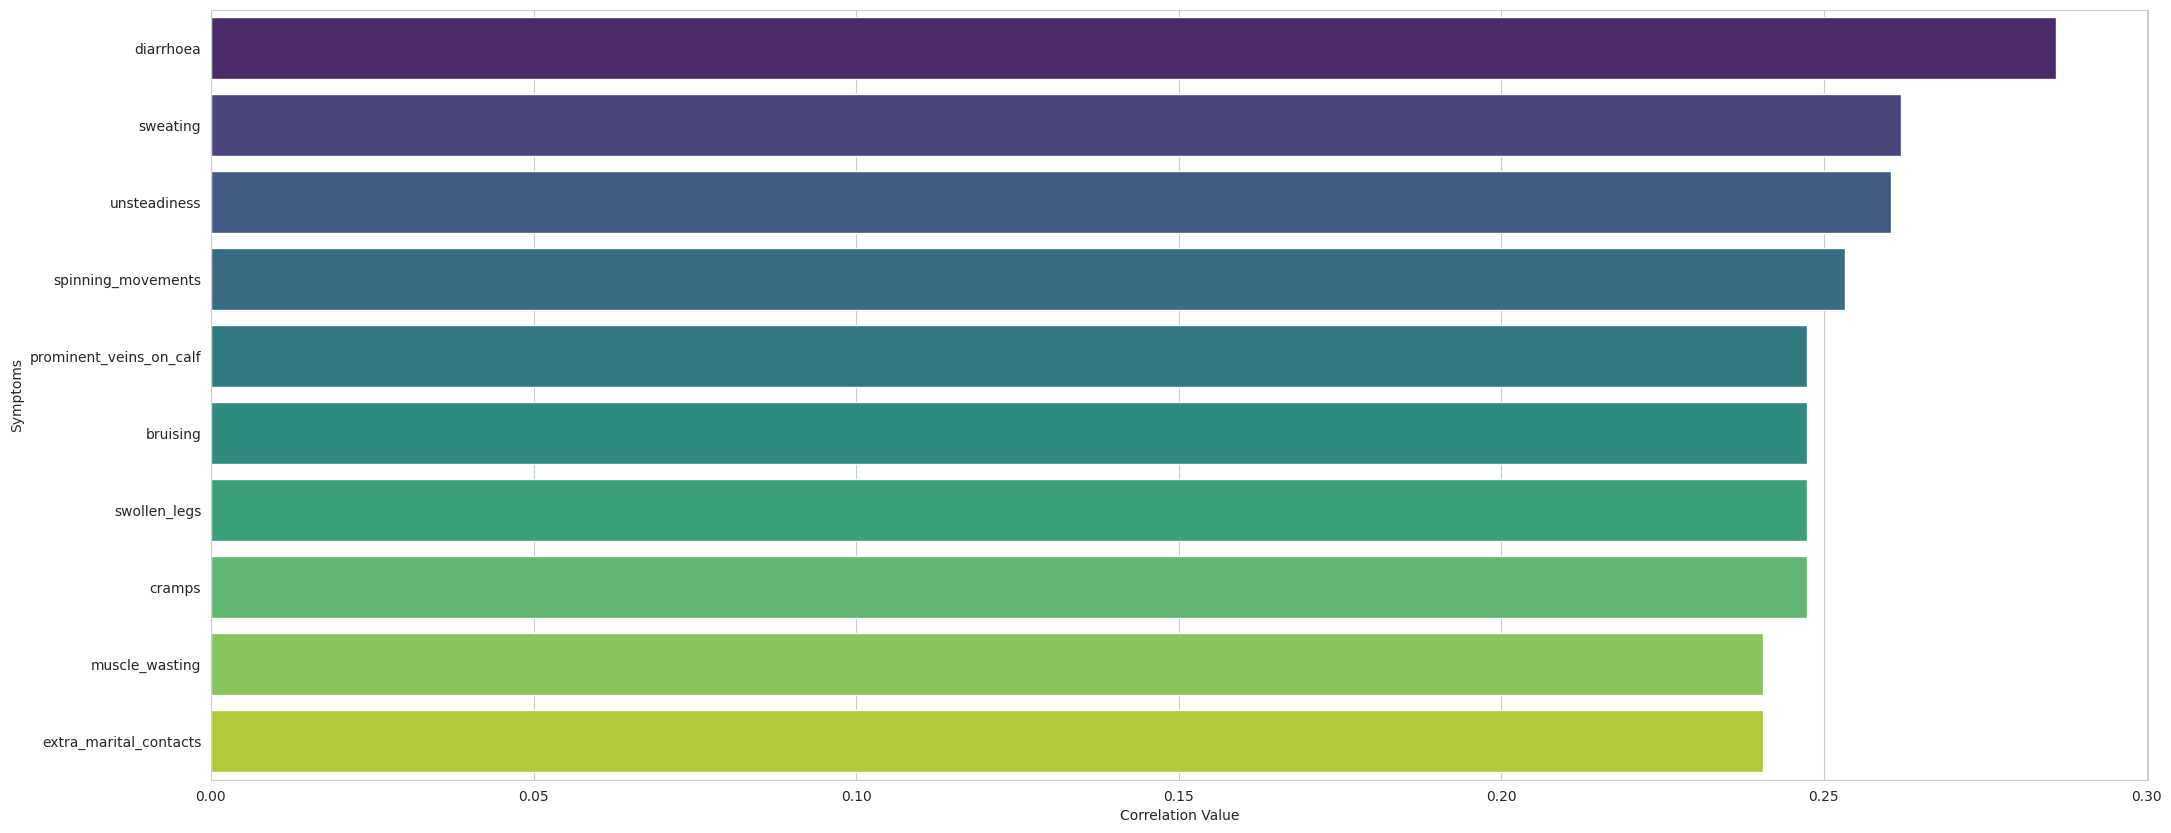

In [95]:
# Compute correlation between each symptom and the target disease
correlation_with_disease = train_data.corr()['prognosis'].abs().sort_values(ascending=False)

# Identify the disease with the highest correlation value
most_correlated_disease = correlation_with_disease.index[1]  # Index 0 is the target disease itself, so we skip it

# Extract parameters with highest correlation with the most correlated disease
parameters_contributing = correlation_with_disease[1:11]  # Assuming you want to extract the top 10 contributing parameters

# Create a visualization
plt.figure(figsize=(25,10))
sns.barplot(x=parameters_contributing.values, y=parameters_contributing.index, palette='viridis')
plt.xlabel("Correlation Value")
plt.ylabel("Symptoms")
plt.show()


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=50)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)


In [ ]:
print(models)

In [72]:
import pandas as pd

# Convert most_common_symptoms dictionary to a DataFrame
most_common_symptoms_df = pd.DataFrame(most_common_symptoms).T
most_common_symptoms_df.columns = ['Most Common Symptom', 'Occurrence']

# Display the DataFrame
print("Most Common Symptoms by Disease:")
print(most_common_symptoms_df)


Most Common Symptoms by Disease:
    Most Common Symptom Occurrence
0              vomiting        114
1            high_fever        114
2             skin_rash        114
3              vomiting        114
4   continuous_sneezing        108
5       muscle_weakness        114
6            high_fever        114
7             neck_pain        114
8               malaise        120
9               itching        114
10               phlegm        120
11             headache        120
12   increased_appetite        120
13         constipation        114
14              itching        114
15              itching        108
16         stomach_pain        114
17            diarrhoea        114
18           chest_pain        114
19    yellowing_of_eyes        120
20              fatigue        114
21           joint_pain        114
22     loss_of_appetite        120
23      loss_of_balance        114
24      muscle_weakness        120
25     excessive_hunger        120
26     enlarged_thyroi

Performs a grid search over the specified parameter grid for the SVM classifier, using 5-fold cross-validation. After finding the best parameters, it will reinitialize the SVM classifier with those parameters, train it on the entire training data, and then evaluate its accuracy on the test data.

The parameter grid defines a set of combinations of C, gamma, and kernel values that will be searched through to find the best combination of hyperparameters for the SVM classifier using GridSearchCV. The goal is to find the combination that maximizes the model's performance on the given dataset.

In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize the SVM classifier
svm_clf = SVC()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Perform Grid Search Cross Validation on training data
grid_search_svm.fit(x_train, y_train)

# Best parameters found
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Reinitialize SVM classifier with best parameters
best_svm_clf = SVC(**grid_search_svm.best_params_)

# Train the model with best parameters on the entire training data
best_svm_clf.fit(x_train, y_train)

# Predictions on test data
y_pred_svm = best_svm_clf.predict(x_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM after parameter tuning:", accuracy_svm)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy of SVM after parameter tuning: 1.0


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Perform Grid Search Cross Validation on training data
grid_search_rf.fit(x_train, y_train)


# Reinitialize Random Forest classifier with best parameters
best_rf_clf = RandomForestClassifier(**grid_search_rf.best_params_)

# Train the model with best parameters on the entire training data
best_rf_clf.fit(x_train, y_train)

# Predictions on test data
y_pred_rf = best_rf_clf.predict(x_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest after parameter tuning:", accuracy_rf)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of Random Forest after parameter tuning: 1.0
